In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# Load Data

In [14]:
data_dir = "../data/Jan1524_Jan2224/"
data_files = [file for file in os.listdir(data_dir) if file.endswith(".csv")]
data = []
for file in data_files:
    df = pd.read_csv(data_dir + file)
    data.append(df.loc[420, ['pm25', 'longitude', 'latitude']].to_numpy())
data = np.array(data)
X, Y = data[:, 1:].astype(np.float32), data[:, 0].astype(np.float32)
print(X.shape, Y.shape)

(8, 2) (8,)


# Interpolation

In [15]:
# create a mesh
merced_boundary = [-120.55, 37.38, -120.39, 37.21]
x_min, x_max = merced_boundary[0], merced_boundary[2]
y_min, y_max = merced_boundary[3], merced_boundary[1]
h = 0.005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_test = np.c_[xx.ravel(), yy.ravel()]
print(X_test.shape)

(1120, 2)


In [16]:
class IDW:
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X_test, p=1):
        w_matrix = np.zeros((X_test.shape[0], self.X.shape[0]))
        for i in range(X_test.shape[0]):
            for j in range(self.X.shape[0]):
                dist = np.linalg.norm(X_test[i] - self.X[j])
                w_matrix[i, j] = 1 / (dist ** p)
        # normalize
        w_matrix = w_matrix / np.sum(w_matrix, axis=1, keepdims=True)
        self.w_matrix = w_matrix
        Y_pred = np.matmul(w_matrix, self.y)
        return Y_pred

In [17]:
model = IDW(X, Y)
Y_pred = model.predict(X_test, p=2)
Y_pred = Y_pred.reshape(xx.shape)
print(Y_pred.shape)

(35, 32)


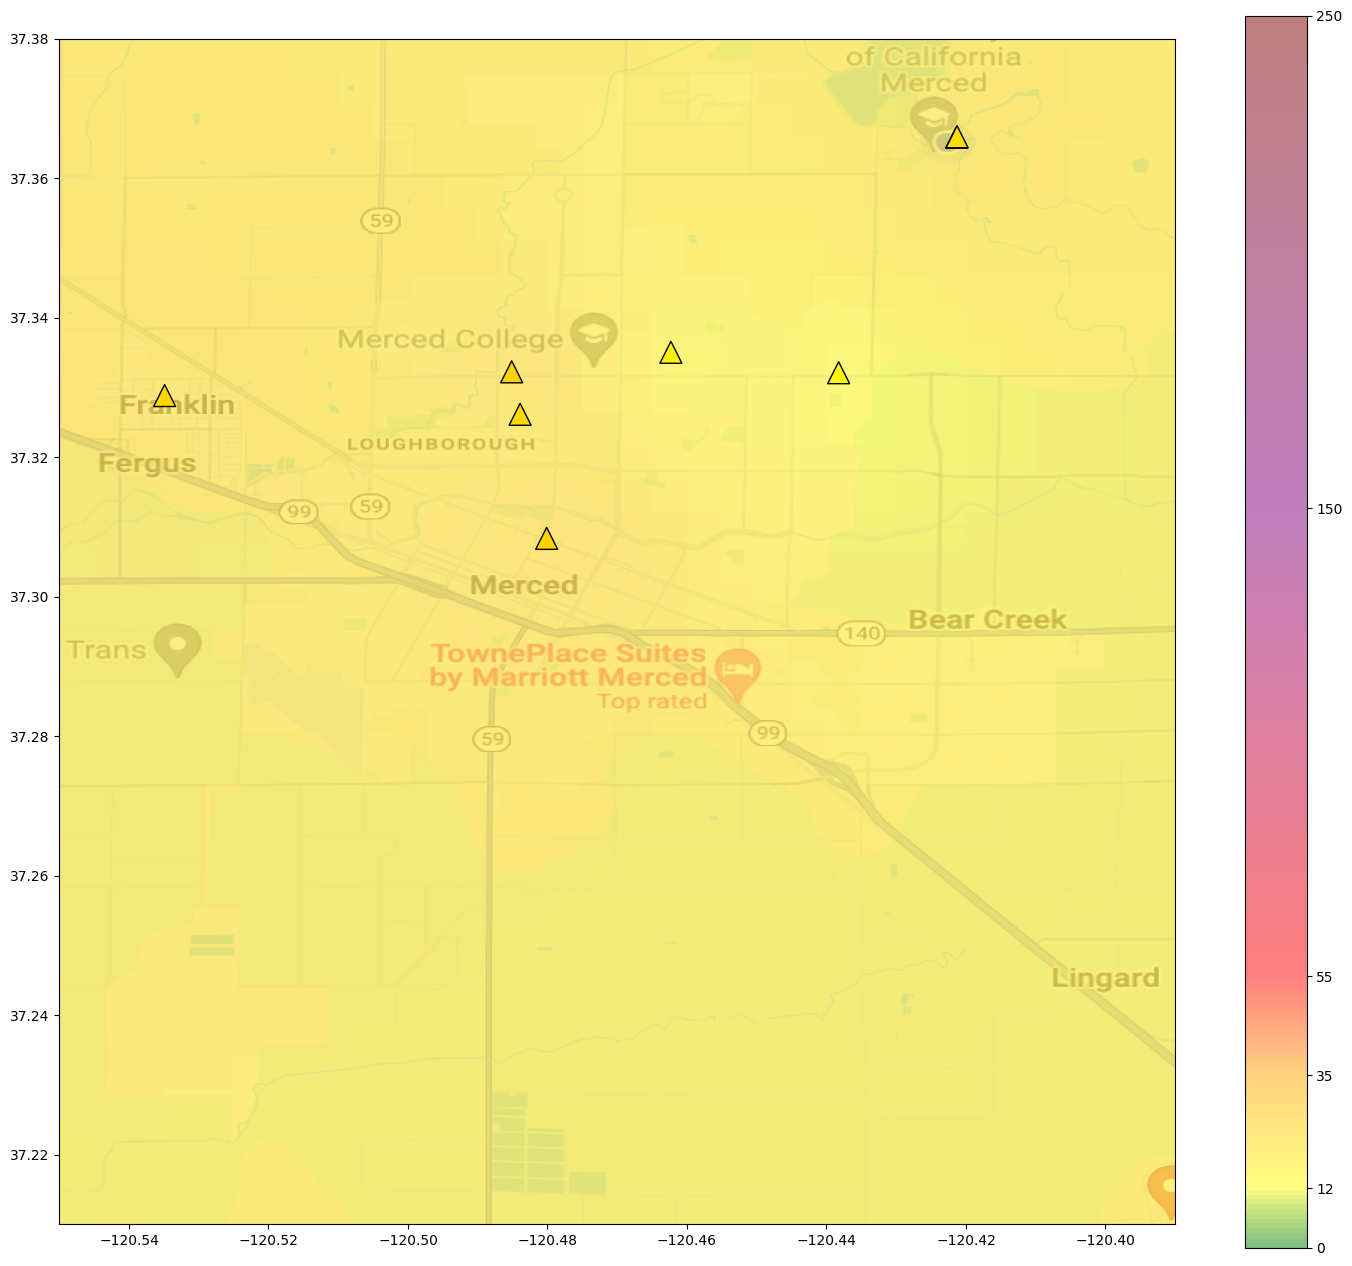

In [18]:
color_list = [(0, "green"), (12 / 250, "yellow"), (35 / 250, "orange"), (55 / 250, "red"), (150 / 250, "purple"), (1, "maroon")]
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list("custom_cmap", color_list)

merced_map = plt.imread("./Merced_Map.png")

fig, ax = plt.subplots(figsize=(18, 16))
ax.grid(False)
extent = merced_boundary[0], merced_boundary[2], merced_boundary[3], merced_boundary[1]
plt.imshow(merced_map, alpha=0.5, extent=extent)
sc = plt.imshow(Y_pred, origin="lower", cmap=custom_cmap, vmin=0, vmax=250, alpha=0.5, extent=extent)
ax.scatter(X[:, 0], X[:, 1],
           c=Y, cmap=custom_cmap,
           marker="^", s=250, edgecolors="black",
           vmin=0, vmax=250, alpha=1)
plt.colorbar(sc, ticks=[0, 12, 35, 55, 150, 250])
plt.show()

In [91]:
model.w_matrix[0,:]

array([0.06530001, 0.06523445, 0.13928666, 0.18321753, 0.14938415,
       0.11435351, 0.18587139, 0.09735229])

In [81]:
X_test[0]

array([-120.55,   37.21])

In [82]:
X[0]

array([  37.36586, -120.42135], dtype=float32)